In [1]:
#TaylorGreen2D
#Energy reporten (gibt verschiedene Möglichkeiten an die Daten zu kommen)
#Dissipation ist zeitliche Ableitung (numpy.gradient)
# ins Paper schauen, wie das definiert ist
# Vis über matplotlib
# welche Reynolds sind im Paper
#die hohen Re bekommt man hier nicht hin (speicher)
#geringe Auflösung bis 100-200

In [2]:
import lettuce as lt
import matplotlib.pyplot as plt
import numpy as np
import torch

In [20]:
##definiere Simulationsparameter

lattice = lt.Lattice(lt.D2Q9, device = "cuda", dtype=torch.float64)
flow = lt.TaylorGreenVortex2D(resolution=256, reynolds_number=100, mach_number=0.05, lattice=lattice)
    #Kollisionsoperator: BGKCollision, MRTCollision, TRTCollision, RegularizedCollision, KBCCollision2D, KBCCollision3D, SmagorinskyCollision, BGKInitialization
collision = lt.BGKCollision(lattice, tau=flow.units.relaxation_parameter_lu)
streaming = lt.StandardStreaming(lattice)
simulation = lt.Simulation(flow=flow, lattice=lattice, collision=collision, streaming=streaming)

In [15]:
energy = lt.IncompressibleKineticEnergy(lattice, flow)
simulation.reporters.append(lt.ObservableReporter(energy, interval=10,out=None))

steps     time     IncompressibleKineticEnergy


In [16]:
mlups = simulation.step(num_steps=10000)

(1001, 3)


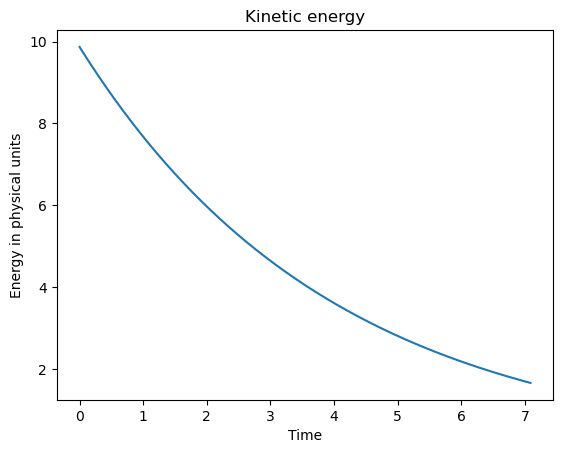

In [17]:
energy = np.array(simulation.reporters[0].out)
print(energy.shape)
plt.plot(energy[:,1],energy[:,2])
plt.title('Kinetic energy')
plt.xlabel('Time')
plt.ylabel('Energy in physical units')
plt.show()

(1001, 3)


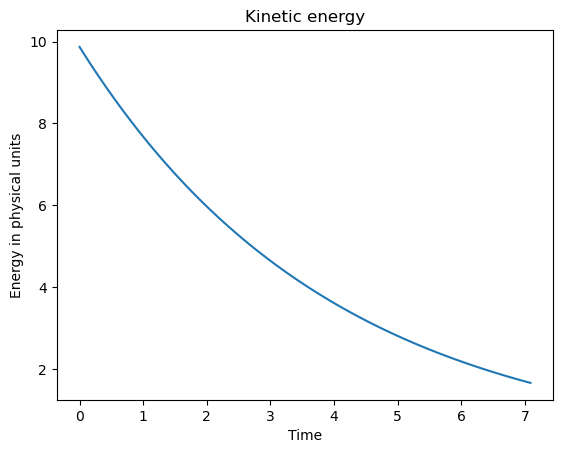

In [13]:
energy = np.array(simulation.reporters[0].out)
print(energy.shape)
plt.plot(energy[:,1],energy[:,2])
plt.title('Kinetic energy')
plt.xlabel('Time')
plt.ylabel('Energy in physical units')
plt.show()